In [46]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [47]:
from DataReader import WaveDumpReader,SubtractBaseline
# template_path = "/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/SelfTrigger_ch0_threshold_2_2_withoutSheld/wave{}.dat"
template_path = "/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/SelfTrigger_ch0_threshold_2_2_SuperSheld/wave{}.dat"
dict_df = {}
for i in range(4):
    df_data = WaveDumpReader(template_path.format(i),nEvts=-1)
    SubtractBaseline(df_data)
    dict_df[f"ch{i}"] = df_data

In [48]:
display(dict_df["ch0"])

,boardID,filePath,channel,pattern,eventCounter,triggerTimeTag,triggerTime,waveform,waveform_sub_base
0,31,24,0,196608,49379,4259700279,3.407760e+07,"[609, 609, 609, 609, 609, 608, 610, 608, 610, ...","[-0.029999999999972715, -0.029999999999972715,..."
1,31,2106,0,262144,49380,4259718779,3.407775e+07,"[608, 609, 608, 609, 608, 609, 607, 609, 609, ...","[0.67999999999995, -0.32000000000005, 0.679999..."
2,31,4188,0,65536,49381,4259799779,3.407840e+07,"[609, 609, 610, 608, 610, 608, 609, 609, 609, ...","[-0.22000000000002728, -0.22000000000002728, -..."
3,31,6270,0,327680,49382,4259810779,3.407849e+07,"[609, 609, 609, 608, 610, 609, 609, 609, 609, ...","[-0.13999999999998636, -0.13999999999998636, -..."
4,31,8352,0,393216,49383,4259925781,3.407941e+07,"[609, 609, 609, 609, 610, 609, 609, 609, 609, ...","[-0.08000000000004093, -0.08000000000004093, -..."
...,...,...,...,...,...,...,...,...,...
201844,31,420239232,0,393216,251223,11027083339,8.821667e+07,"[608, 608, 608, 609, 609, 609, 609, 609, 609, ...","[0.7899999999999636, 0.7899999999999636, 0.789..."
201845,31,420241314,0,0,251224,11027100089,8.821680e+07,"[608, 608, 609, 609, 608, 609, 609, 609, 608, ...","[0.8500000000000227, 0.8500000000000227, -0.14..."
201846,31,420243396,0,131072,251225,11027114339,8.821691e+07,"[609, 609, 609, 610, 608, 609, 608, 610, 609, ...","[-0.09000000000003183, -0.09000000000003183, -..."
201847,31,420245478,0,131072,251226,11027158089,8.821726e+07,"[609, 609, 608, 609, 609, 609, 609, 610, 609, ...","[-0.07000000000005002, -0.07000000000005002, 0..."


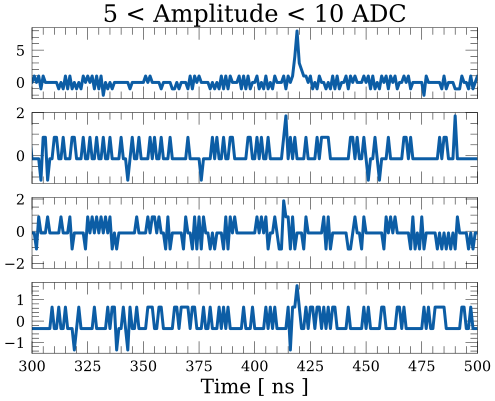

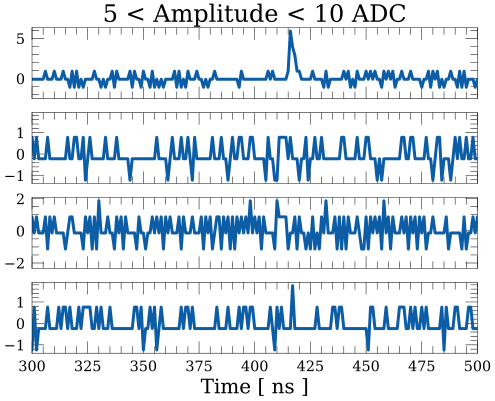

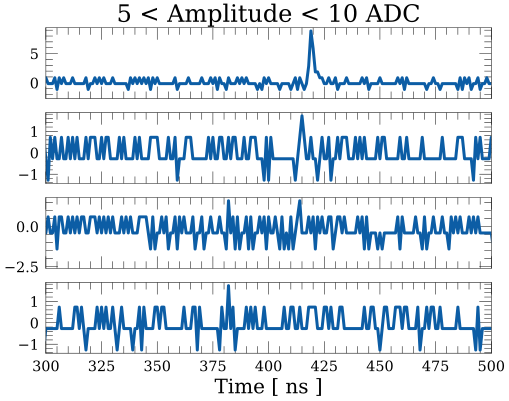

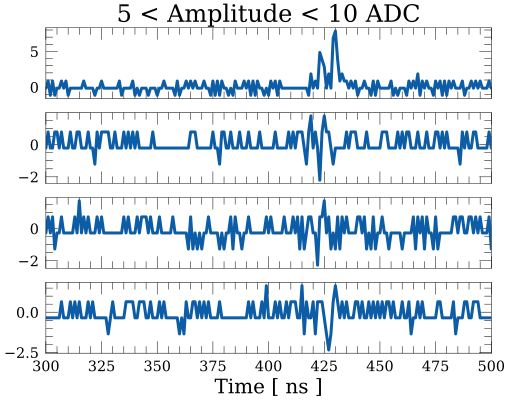

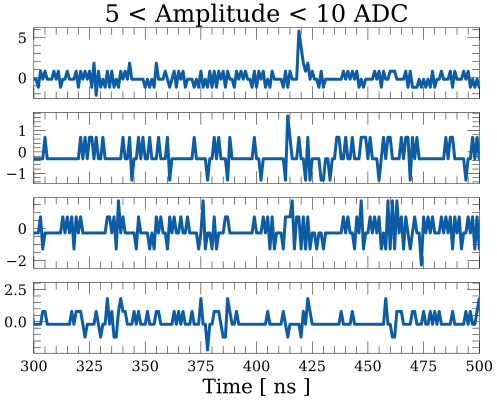

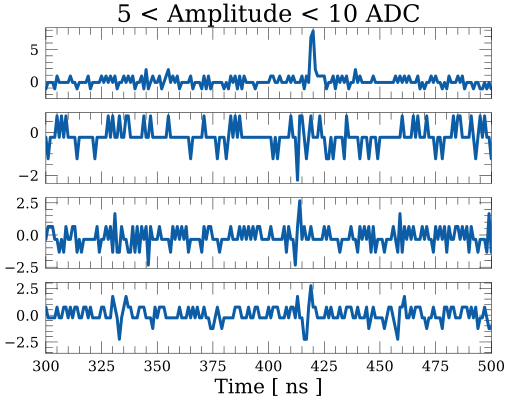

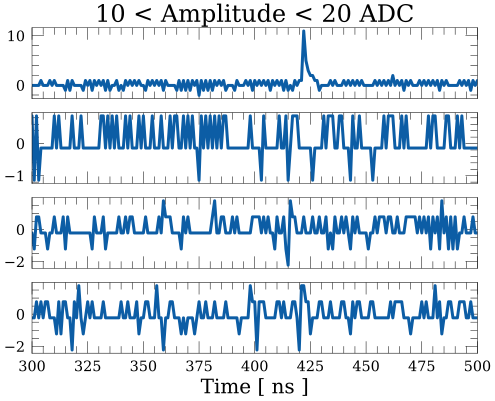

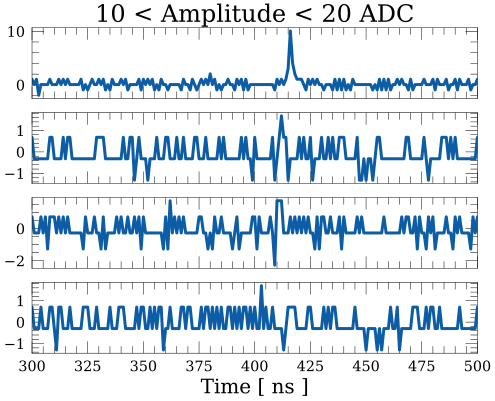

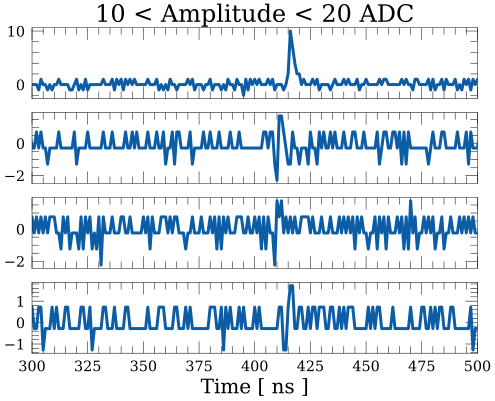

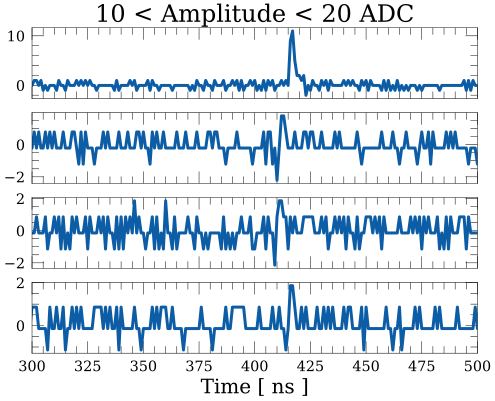

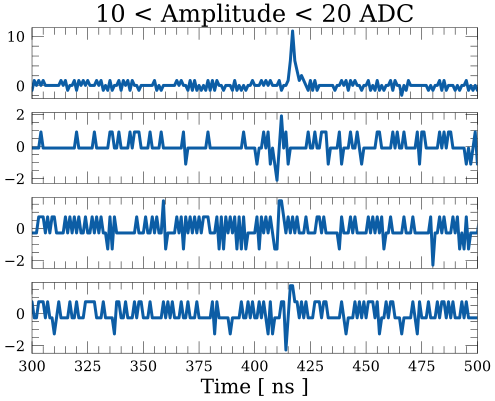

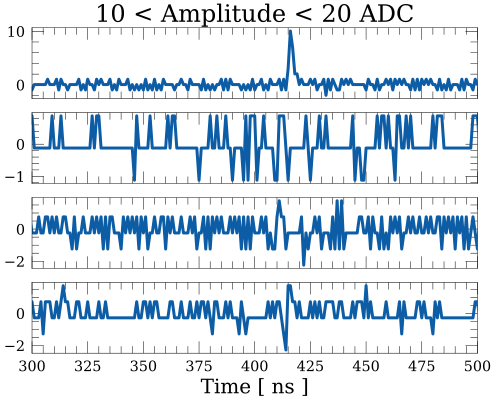

In [49]:
bins = [5, 10,20,30]
for amp_low, amp_high in zip(bins[:-1], bins[1:]):
    i_plot = 0
    for i in range(100):
        if amp_high>max(dict_df[f"ch0"]["waveform_sub_base"][i])>amp_low:
            fig, axes = plt.subplots(4, sharex=True)
            axes[0].set_title(f"{amp_low} < Amplitude < {amp_high} ADC")
            i_plot += 1
            for j in range(4):
                axes[j].plot(dict_df[f"ch{j}"]["waveform_sub_base"][i])
                plt.xlim(300,500)
                plt.xlabel("Time [ ns ]")

        if i_plot>5:
            break

In [50]:
bins = [4,10]
for amp_low, amp_high in zip(bins[:-1], bins[1:]):
    i_plot = 0
    for i in range(100):
        # if (amp_high>max(dict_df[f"ch1"]["waveform_sub_base"][i])>amp_low) and\
        #         (-4>min(dict_df[f"ch1"]["waveform_sub_base"][i])>-10):
        if (-4>min(dict_df[f"ch1"]["waveform_sub_base"][i])>-10):
            fig, axes = plt.subplots(4, sharex=True)
            axes[0].set_title(f"{amp_low} < Amplitude < {amp_high} ADC")
            i_plot += 1
            for j in range(4):
                axes[j].plot(dict_df[f"ch{j}"]["waveform_sub_base"][i])
                plt.xlim(300,500)
                plt.xlabel("Time [ ns ]")

        if i_plot>5:
            break

In [51]:
dict_max = {f"ch{j}":[] for j in range(4) }
dict_min = {f"ch{j}":[] for j in range(4) }
v_baseline_max = []
v_baseline_min = []
n_win =100

for i in range(len(dict_df[f"ch0"]["waveform_sub_base"])):
    index_max = np.argmax(dict_df[f"ch0"]["waveform_sub_base"][i])
    if index_max+n_win> len(dict_df[f"ch0"]["waveform_sub_base"][i]):
        continue
    index_get_max = range(index_max-n_win, index_max+n_win)
    if max(dict_df[f"ch1"]["waveform_sub_base"][i][index_get_max])>10 or \
        max(dict_df[f"ch2"]["waveform_sub_base"][i][index_get_max])>10 or \
        max(dict_df[f"ch3"]["waveform_sub_base"][i][index_get_max])>10:
        continue

    for j in range(4):
        dict_max[f"ch{j}"].append(max(dict_df[f"ch{j}"]["waveform_sub_base"][i][index_get_max]))
        dict_min[f"ch{j}"].append(min(dict_df[f"ch{j}"]["waveform_sub_base"][i][index_get_max]))
    v_baseline_max.append(max(dict_df[f"ch1"]["waveform_sub_base"][i][:100]))
    v_baseline_min.append(min(dict_df[f"ch1"]["waveform_sub_base"][i][:100]))


In [52]:
import seaborn as sns
from SeabornTools import JointPlot
df_max = pd.DataFrame.from_dict(dict_max)
df_max["Tag"] = ["max"]*len(df_max)
df_min = pd.DataFrame.from_dict(dict_min)
df_min["Tag"] = ["min"]*len(df_min)
df_joint = pd.concat((df_max, df_min))
# display(df_joint)
# sns.pairplot(data=df_joint[df_joint["Tag"]=="max"][:2000], plot_kws={'s': 3})

Text(0, 0.5, 'Min of Baseline')

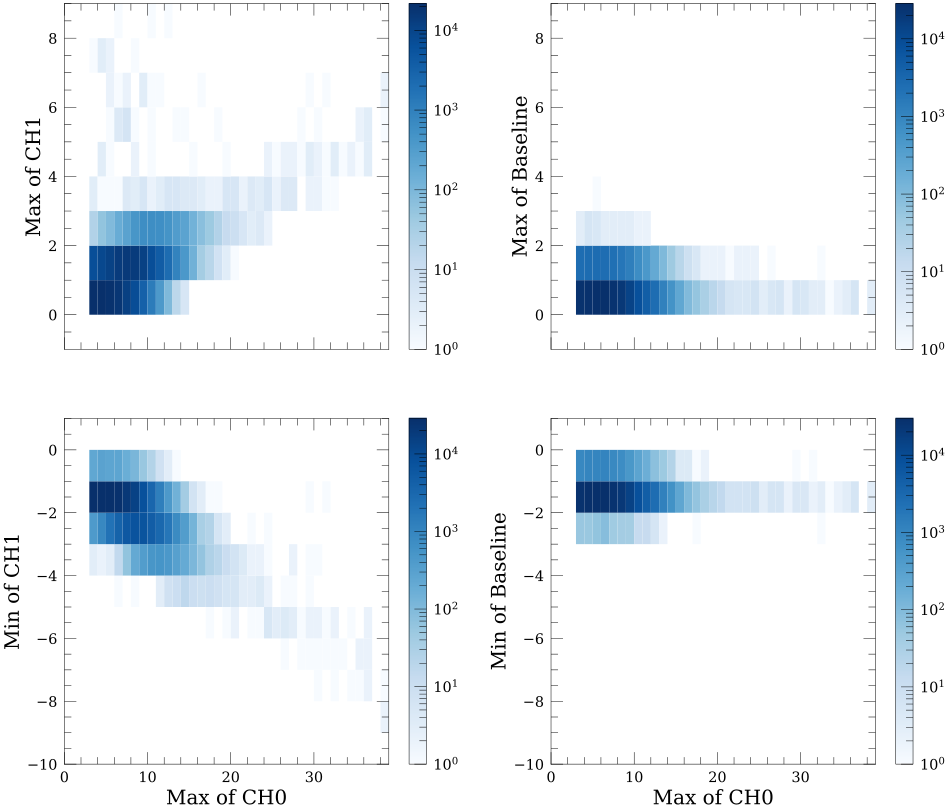

In [53]:
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(2,2, sharex=True, figsize=(16,14))
im1 = axes[0][0].hist2d(dict_max["ch0"], dict_max["ch1"], bins=(range(0,40), range(-1,10)), cmap="Blues",
           norm=LogNorm())

# plt.figure()
im2 = axes[1][0].hist2d(dict_max["ch0"], dict_min["ch1"], bins=(range(0,40), range(-10,2)), cmap="Blues",
           norm=LogNorm())

im3 = axes[0][1].hist2d(dict_max["ch0"], v_baseline_max, bins=(range(0,40), range(-1,10)), cmap="Blues",
                     norm=LogNorm())
im4 = axes[1][1].hist2d(dict_max["ch0"], v_baseline_min, bins=(range(0,40), range(-10,2)), cmap="Blues",
                        norm=LogNorm())

fig.colorbar(im1[3],ax=axes[0][0])
fig.colorbar(im2[3],ax=axes[1][0])
fig.colorbar(im3[3],ax=axes[0][1])
fig.colorbar(im4[3],ax=axes[1][1])
axes[1][0].set_xlabel("Max of CH0")
axes[1][1].set_xlabel("Max of CH0")
axes[1][0].set_ylabel("Min of CH1")
axes[0][0].set_ylabel("Max of CH1")

axes[0][1].set_ylabel("Max of Baseline")
axes[1][1].set_ylabel("Min of Baseline")


In [54]:
from collections import Counter
counter = Counter( ((np.array(dict_max["ch1"])>=2)|(np.array(dict_min["ch1"])<=-2)) &(np.array(dict_max["ch0"])<15) )
counter_total = Counter( (np.array(dict_max["ch0"])<15) )
print(counter[True], counter_total[True])
print("ratio:\t", counter[True]/counter_total[True])

42539 201087
ratio:	 0.21154525155778345


(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0431e+04, 2.2000e+01,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.7126e+04, 1.0290e+03,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39]),
 array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,


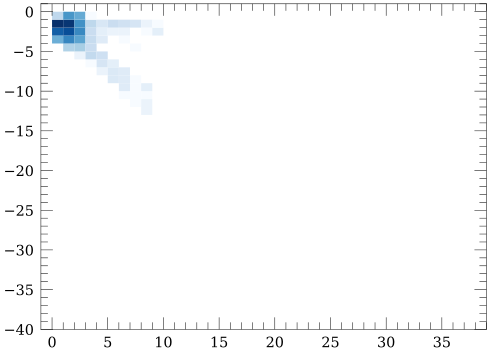

In [55]:
plt.hist2d(dict_max["ch1"], dict_min["ch1"], bins=(range(-1,40), range(-40,2)), cmap="Blues",
           norm=LogNorm())